# 概要

* 取得した掲示板リストのデータ確認
* 数値データは無いので、データ数について集計する
* 掲示板がCloseした日時だが、ざっくり「書き込み数 / 1000」の値になるはず
* ちょいちょい取得ミスしてるものもありそうだが、一旦無視する（スレタイとデータ件数から、1,372件 = 約8%？）

# 初期設定

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
import japanize_matplotlib

# 読み込み

In [2]:
# 確認
y = 2019
dfs = [pd.read_pickle('data/' + f'list_{y}.pkl') for y in range(2014, 2020)]
df = pd.concat(dfs, axis=0, ignore_index=True).sort_values('日付')
df

,スレタイ,日付,リンク
0,【mobage】アイドルマスター ｼﾝﾃﾞﾚﾗｶﾞｰﾙｽﾞ 2人目(1000),2014-03-23 12:21:00,https://hayabusa3.open2ch.net/test/read.cgi/ap...
1,【mobage】アイドルマスター ｼﾝﾃﾞﾚﾗｶﾞｰﾙｽﾞ 3人目 (1000),2014-03-24 12:23:00,https://hayabusa3.open2ch.net/test/read.cgi/ap...
3,【mobage】アイドルマスター ｼﾝﾃﾞﾚﾗｶﾞｰﾙｽﾞ 4人目 (1000),2014-03-24 23:49:00,https://hayabusa3.open2ch.net/test/read.cgi/ap...
2,【mobage】アイドルマスター ｼﾝﾃﾞﾚﾗｶﾞｰﾙｽﾞ 4人目 (1000),2014-03-25 23:04:00,https://hayabusa3.open2ch.net/test/read.cgi/ap...
4,【mobage】アイドルマスター ｼﾝﾃﾞﾚﾗｶﾞｰﾙｽﾞ 6人目(1000),2014-03-26 16:21:00,https://hayabusa3.open2ch.net/test/read.cgi/ap...
...,...,...,...
15791,【mobage】アイドルマスターｼﾝﾃﾞﾚﾗｶﾞｰﾙｽﾞ17164人目(1000),2019-12-31 20:29:00,https://hayabusa3.open2ch.net/test/read.cgi/ap...
15792,【mobage】アイドルマスターｼﾝﾃﾞﾚﾗｶﾞｰﾙｽﾞ17165人目【ご報告乱舞コンマ】(...,2019-12-31 21:12:00,https://hayabusa3.open2ch.net/test/read.cgi/ap...
15793,【mobage】アイドルマスターｼﾝﾃﾞﾚﾗｶﾞｰﾙｽﾞ17166人目【比奈コンマ】(1001),2019-12-31 21:57:00,https://hayabusa3.open2ch.net/test/read.cgi/ap...
15794,【mobage】アイドルマスターｼﾝﾃﾞﾚﾗｶﾞｰﾙｽﾞ17167人目【今年最後の比奈コンマ...,2019-12-31 23:01:00,https://hayabusa3.open2ch.net/test/read.cgi/ap...


# 確認

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15796 entries, 0 to 15795
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   スレタイ    15796 non-null  object        
 1   日付      15796 non-null  datetime64[ns]
 2   リンク     15796 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 493.6+ KB


In [4]:
df.isnull().sum()

スレタイ    0
日付      0
リンク     0
dtype: int64

In [5]:
num_weekday = {
    0: '月',
    1: '火',
    2: '水',
    3: '木',
    4: '金',
    5: '土',
    6: '日',
}

# 基礎集計

In [6]:
# 集計したい列追加
df['y'] = df['日付'].apply(lambda x: x.year)
df['m'] = df['日付'].apply(lambda x: x.month)
df['d'] = df['日付'].apply(lambda x: x.day)
df['h'] = df['日付'].apply(lambda x: x.hour)
df.head(3)

,スレタイ,日付,リンク,date,y,m,d,h,wd_num,wd,last_monday,month_first_day
0,【mobage】アイドルマスター ｼﾝﾃﾞﾚﾗｶﾞｰﾙｽﾞ 2人目(1000),2014-03-23 12:21:00,https://hayabusa3.open2ch.net/test/read.cgi/ap...,2014-03-23,2014,3,23,12,6,日,2014-03-17,2014-03-01
1,【mobage】アイドルマスター ｼﾝﾃﾞﾚﾗｶﾞｰﾙｽﾞ 3人目 (1000),2014-03-24 12:23:00,https://hayabusa3.open2ch.net/test/read.cgi/ap...,2014-03-24,2014,3,24,12,0,月,2014-03-24,2014-03-01
3,【mobage】アイドルマスター ｼﾝﾃﾞﾚﾗｶﾞｰﾙｽﾞ 4人目 (1000),2014-03-24 23:49:00,https://hayabusa3.open2ch.net/test/read.cgi/ap...,2014-03-24,2014,3,24,23,0,月,2014-03-24,2014-03-01


In [30]:
df = (
    df
    .groupby(['y', 'm', 'd', 'h'])['スレタイ']
    .count()
    .reset_index()
    .rename(columns={'スレタイ': 'cnt'})
)
df

,y,m,d,h,cnt
0,2014,3,23,12,1
1,2014,3,24,12,1
2,2014,3,24,23,1
3,2014,3,25,23,1
4,2014,3,26,16,1
...,...,...,...,...,...
15722,2019,12,31,17,1
15723,2019,12,31,19,1
15724,2019,12,31,20,1
15725,2019,12,31,21,2


In [34]:
df['date'] = (df['y']*10000 + df['m']*100 + df['d']).apply(lambda x: str(x)).apply(pd.to_datetime)
df['wd_num'] = df['date'].apply(lambda x: x.weekday())
df['wd'] = df['date'].apply(lambda x: x.weekday()).map(num_weekday)
df['last_monday'] = df['date'].apply(lambda x: x.date() - datetime.timedelta(days=x.weekday()))
df['month_first_day'] = df['date'].apply(lambda x: x.date() - datetime.timedelta(days=x.day-1))
df.head(3)

,y,m,d,h,cnt,date,wd_num,wd,last_monday,month_first_day
0,2014,3,23,12,1,2014-03-23,6,日,2014-03-17,2014-03-01
1,2014,3,24,12,1,2014-03-24,0,月,2014-03-24,2014-03-01
2,2014,3,24,23,1,2014-03-24,0,月,2014-03-24,2014-03-01


## 時系列

### 日ごと

In [35]:
df.groupby('date')['cnt'].sum()

date
2014-03-23     1
2014-03-24     2
2014-03-25     1
2014-03-26     1
2014-03-27     1
              ..
2019-12-27    12
2019-12-28    14
2019-12-29    13
2019-12-30    14
2019-12-31    17
Name: cnt, Length: 2054, dtype: int64

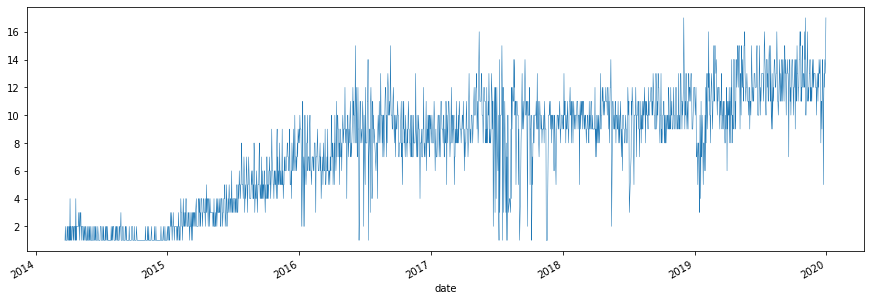

In [36]:
df.groupby('date')['cnt'].sum().plot(figsize=(15, 5), linewidth = 0.5)

In [37]:
df.groupby('date')['cnt'].sum().describe()

count    2054.000000
mean        7.690360
std         3.935987
min         1.000000
25%         4.000000
50%         9.000000
75%        11.000000
max        17.000000
Name: cnt, dtype: float64

### 週ごと

In [38]:
# 最初の週は1日分しかデータ無いので、除く
df[df['last_monday']>datetime.date(2014, 3, 17)].groupby('last_monday')['cnt'].sum()

last_monday
2014-03-24     9
2014-03-31    13
2014-04-07    11
2014-04-14    12
2014-04-21    14
              ..
2019-12-02    83
2019-12-09    90
2019-12-16    78
2019-12-23    79
2019-12-30    31
Name: cnt, Length: 302, dtype: int64

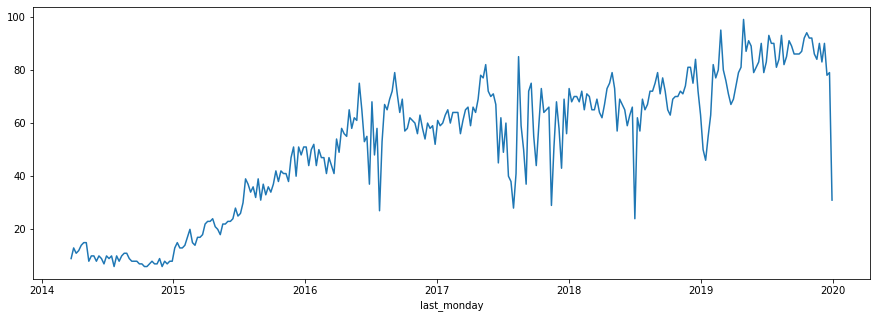

In [39]:
df[df['last_monday']>datetime.date(2014, 3, 17)].groupby('last_monday')['cnt'].sum().plot(figsize=(15, 5))

In [40]:
df[df['last_monday']>datetime.date(2014, 3, 17)].groupby('last_monday')['cnt'].sum().describe()

count    302.000000
mean      52.301325
std       25.667150
min        6.000000
25%       32.250000
50%       59.000000
75%       71.000000
max       99.000000
Name: cnt, dtype: float64

### 月ごと

In [41]:
# 最初の週は1日分しかデータ無いので、除く
df[df['month_first_day']>datetime.date(2014, 3, 1)].groupby('month_first_day')['cnt'].sum()

month_first_day
2014-04-01     55
2014-05-01     49
2014-06-01     38
2014-07-01     38
2014-08-01     45
             ... 
2019-08-01    374
2019-09-01    378
2019-10-01    396
2019-11-01    381
2019-12-01    374
Name: cnt, Length: 69, dtype: int64

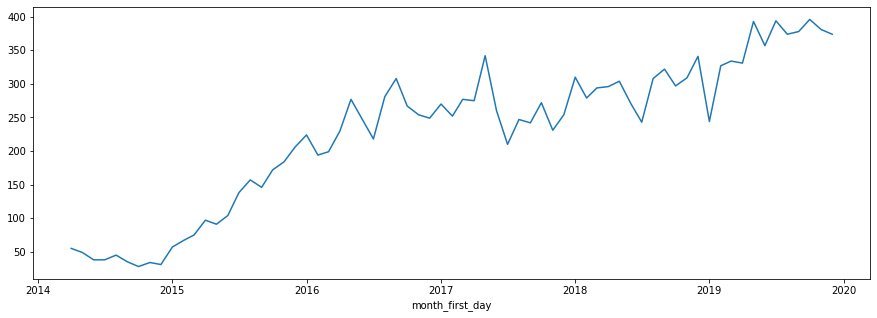

In [42]:
df[df['month_first_day']>datetime.date(2014, 3, 1)].groupby('month_first_day')['cnt'].sum().plot(figsize=(15, 5))

In [43]:
df[df['month_first_day']>datetime.date(2014, 3, 1)].groupby('month_first_day')['cnt'].sum().describe()

count     69.000000
mean     228.753623
std      108.694175
min       28.000000
25%      157.000000
50%      252.000000
75%      308.000000
max      396.000000
Name: cnt, dtype: float64

* 徐々に増えている
* 周期性があるかどうかは、パッと見わからない

## 属性ごと

### 年

In [44]:
df.groupby('y')['cnt'].sum()

y
2014     365
2015    1494
2016    2948
2017    3132
2018    3574
2019    4283
Name: cnt, dtype: int64

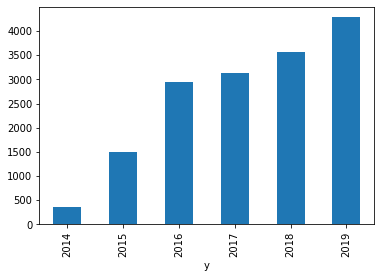

In [45]:
# 2014年は3月スタートなので、参考程度
# 徐々に増えている
df.groupby('y')['cnt'].sum().plot(kind='bar')

### 月

In [46]:
# 2014年は3月途中からしかデータないので、2015年以降に絞る
df[df['y'] >= 2015].groupby('m')['cnt'].sum()

m
1     1105
2     1119
3     1179
4     1229
5     1407
6     1239
7     1203
8     1367
9     1396
10    1404
11    1359
12    1424
Name: cnt, dtype: int64

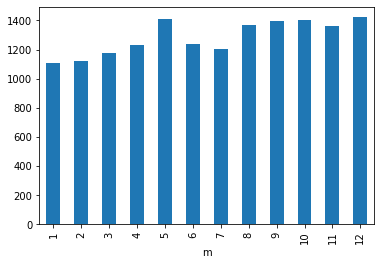

In [47]:
# 8-12月が多い傾向
# 春でも、5月は多い
df[df['y'] >= 2015].groupby('m')['cnt'].sum().plot(kind='bar')

In [48]:
# 2015年も単調増加なので、2016年以降でも見てみる
df[df['y'] >= 2016].groupby('m')['cnt'].sum()

m
1     1048
2     1052
3     1104
4     1132
5     1316
6     1135
7     1065
8     1210
9     1250
10    1232
11    1175
12    1218
Name: cnt, dtype: int64

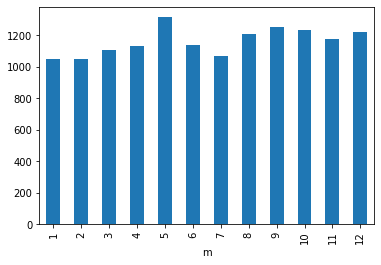

In [49]:
# それでも、後半が多め、前半でも5月は多め
df[df['y'] >= 2016].groupby('m')['cnt'].sum().plot(kind='bar')

### 日

In [50]:
df.groupby('d')['cnt'].sum()

d
1     520
2     510
3     513
4     505
5     493
6     491
7     484
8     490
9     544
10    546
11    489
12    512
13    519
14    544
15    512
16    499
17    533
18    526
19    551
20    539
21    526
22    536
23    521
24    515
25    493
26    532
27    530
28    534
29    497
30    511
31    281
Name: cnt, dtype: int64

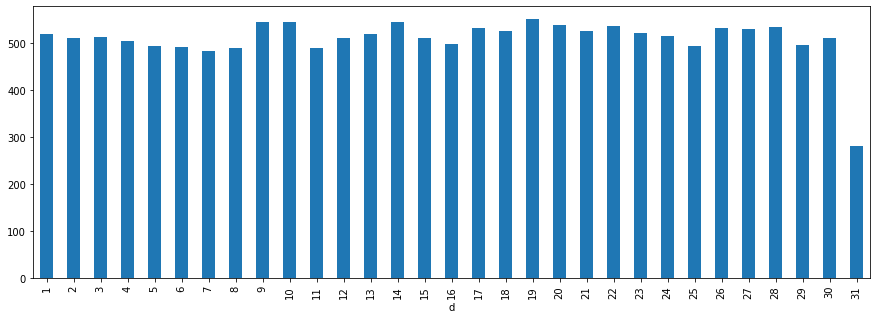

In [51]:
# 当たり前だが、31日は少ない
# 他はそこそこ平等
# 上旬では、9, 10日が多め
df.groupby('d')['cnt'].sum().plot(kind='bar', figsize=(15, 5))

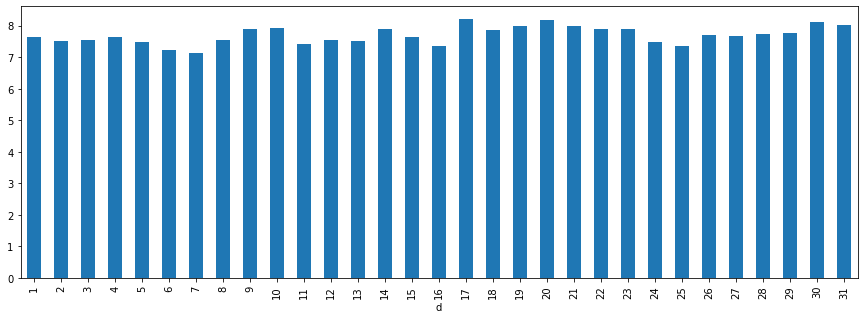

In [58]:
# 平均にするとそこそこ平等
(
    df
    .groupby(['y', 'm', 'd'])['cnt'].sum() # 毎日の合計とる
    .groupby('d').mean() # 日付だけで平均とる
    .plot(kind='bar', figsize=(15, 5))
)

### 曜日

In [60]:
df.groupby(['wd_num', 'wd'])['cnt'].sum()

wd_num  wd
0       月     2184
1       火     2155
2       水     2197
3       木     2085
4       金     2124
5       土     2445
6       日     2606
Name: cnt, dtype: int64

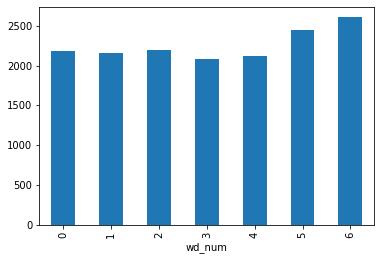

In [61]:
# 平日はほぼ横ばい
# 土日は多い傾向
df.groupby('wd_num')['cnt'].sum().plot(kind='bar')

### 時間

In [62]:
df.groupby('h')['cnt'].sum()

h
0     1064
1      861
2      546
3      335
4      104
5       68
6      114
7      224
8      381
9      486
10     571
11     667
12     753
13     745
14     687
15     780
16     702
17     732
18     768
19     854
20     958
21    1086
22    1121
23    1189
Name: cnt, dtype: int64

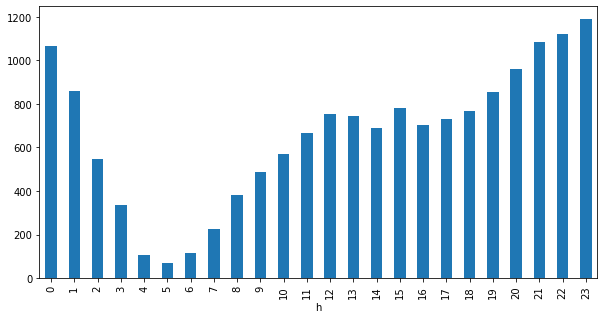

In [63]:
# 19時から増加し、23時あたりがピーク
# 早朝4-6時が一番少ない
# 12-13時の山は昼休み？15時は休憩？
df.groupby('h')['cnt'].sum().plot(kind='bar', figsize=(10, 5))

# 深堀り

ここまで見て、気になること
* 月によって、月内のどの日に書き込みが多いか、傾向の違いあるのでは？
* 曜日によって、どの時間に書き込みが多いか、傾向の違いあるのでは？

## 月ごとの日別掲示板数

1 - 3


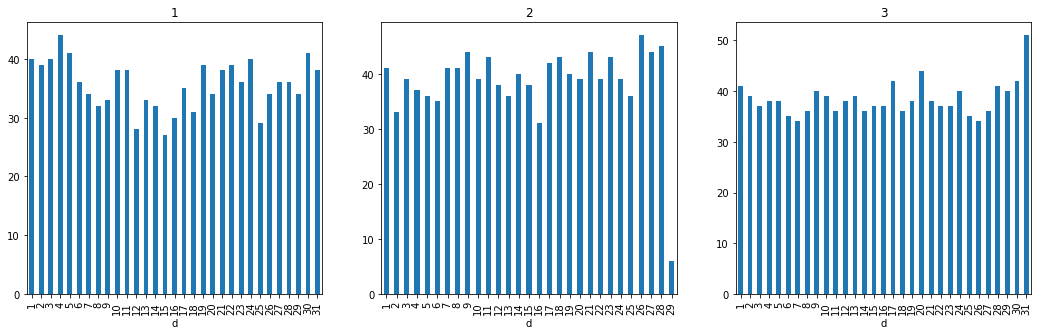

4 - 6


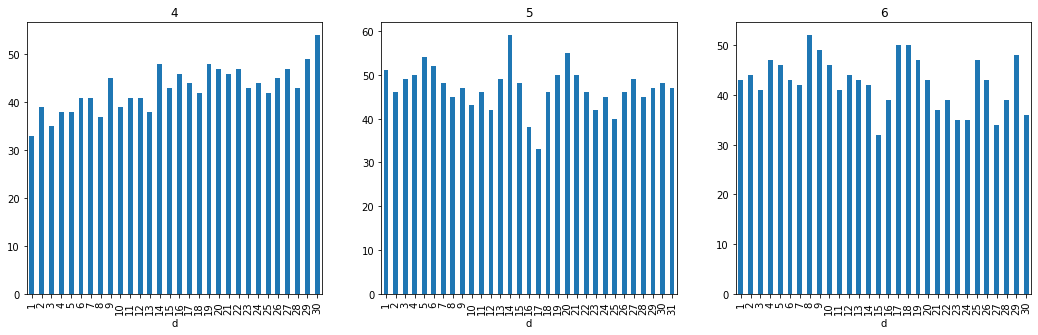

7 - 9


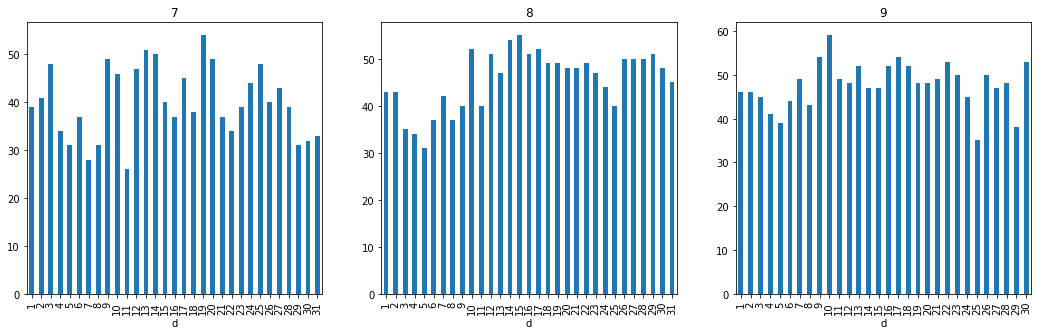

10 - 12


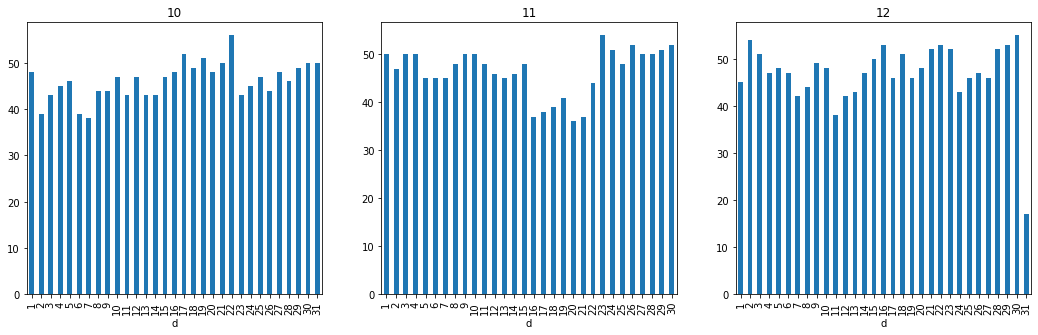

In [64]:
for m in [1, 4, 7, 10]:
    print(m, '-', m+2)
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    df[df['m']==m].groupby('d')['cnt'].sum().plot(kind='bar',   ax=axes[0])
    axes[0].set_title(m)
    df[df['m']==m+1].groupby('d')['cnt'].sum().plot(kind='bar', ax=axes[1])
    axes[1].set_title(m+1)
    df[df['m']==m+2].groupby('d')['cnt'].sum().plot(kind='bar', ax=axes[2])
    axes[2].set_title(m+2)
    plt.show()

* 1月
  * 月初が多い。年始だからみんな休みで書き込んでる？
* 2月
  * あまり傾向見えないが、月末のほうが多いか？
  * 29日は4年に1回しかないので、当然少ない
* 3月
  * 31日が異様に多い。エイプリルフールと関係ある？
* 4月
  * 月末になるにつれて、徐々に増えていく
  * 第5回（2016年）以降、[総選挙](https://dic.pixiv.net/a/%E3%82%B7%E3%83%B3%E3%83%87%E3%83%AC%E3%83%A9%E3%82%AC%E3%83%BC%E3%83%AB%E7%B7%8F%E9%81%B8%E6%8C%99)が4月上旬~5月上旬になったためか？
* 5月
  * 13日、20日あたりが多い。総選挙の結果発表の影響と思われる
    * 第5回（2016年）：5/13
    * 第6回（2017年）：5/14
    * 第7回（2018年）：5/14
    * 第8回（2019年）：5/20
* 6月
  * 10日と20日あたりに山があるように見える
* 7月
  * 中旬の増減が激しい
* 8月
  * 上旬 < 下旬 < 中旬の傾向
* 9月
  * 下旬に少ない日が見られるが、特徴的な傾向は見えない
* 10月
  * あまり特徴は見えない
* 11月
  * 15-20日がやたら少ない
* 12月
  * 31日のデータが少ない。
    * よく見たら取得失敗していた。使った検索サイト、2019年以外は12/31のデータが出てこない
    * サーバーが落ちてたりするのかも？

## 曜日ごとの時間別掲示板数

0 - 3


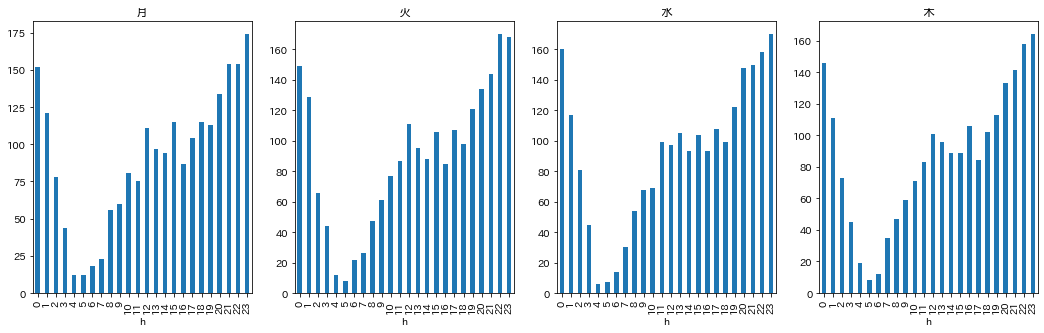

4 - 7


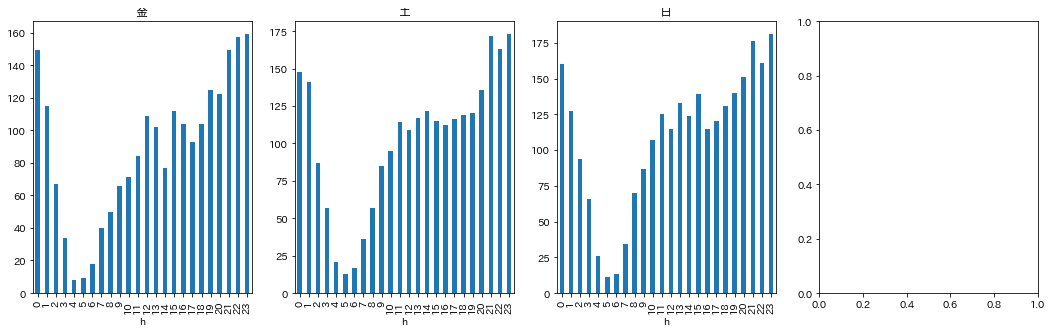

In [67]:
for wd_num in [0, 4]:
    print(wd_num, '-', wd_num+3)
    fig, axes = plt.subplots(1, 4, figsize=(18, 5))
    df[df['wd_num']==wd_num].groupby('h')['cnt'].sum().plot(kind='bar',   ax=axes[0])
    axes[0].set_title(num_weekday[wd_num])
    df[df['wd_num']==wd_num+1].groupby('h')['cnt'].sum().plot(kind='bar', ax=axes[1])
    axes[1].set_title(num_weekday[wd_num+1])
    df[df['wd_num']==wd_num+2].groupby('h')['cnt'].sum().plot(kind='bar', ax=axes[2])
    axes[2].set_title(num_weekday[wd_num+2])
    if wd_num == 0:
        df[df['wd_num']==wd_num+3].groupby('h')['cnt'].sum().plot(kind='bar', ax=axes[3])
        axes[3].set_title(num_weekday[wd_num+3])
    plt.show()

* 「夕方から増え、日付またぐあたりでピークになり、早朝に少ない」という大きな傾向は変わらない
*  ただ、やはり土日は昼から夕方も他の曜日に比べると多いように見える